# import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

# Reading the Data

In [2]:
df = pd.read_csv('/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv')

# Exploring the Data

In [3]:
df.shape

(2956, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


**Date: The date of the trading day.**

**Open: The opening price of the stock on that trading day.**

**High: The highest price the stock reached during that trading day.**

**Low: The lowest price the stock reached during that trading day.**

**Close: The closing price of the stock on that trading day.**

**Adj Close: The adjusted closing price, which accounts for any corporate actions such as stock splits, dividends, etc.**

**Volume: The trading volume, i.e., the number of shares traded during that trading day.**

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


**From describe the data we found outlier in mean when open and min  and max and in another columns also and the outlier is big**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


**from info we found no value equal nan and we found the date from data type object and will convert it**

In [8]:
df.duplicated().sum()

0

**there are no duplicated value**

In [9]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**there are no nan value**

# Cleaning the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   Open       2956 non-null   float64       
 2   High       2956 non-null   float64       
 3   Low        2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Adj Close  2956 non-null   float64       
 6   Volume     2956 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.8 KB


**From last three cell to convert the data type from object to date time for Date columns**

In [13]:
df.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [14]:
df.rename(columns={'Date' : 'Trading Day', 'Open' : 'The Opening Price of the Stock', 
                   'High' : 'The Highest Price the Stock', 'Low' : 'The Lowest Price the Stock', 
                   'Close' : 'The Closing Price of the Stock', 'Adj Close' : 'The Adjusted Closing Price', 
                   'Volume' : 'The Trading Volume'},inplace = True)

**Make the name of columns more meanning**

In [15]:
df.columns.to_list()

['Trading Day',
 'The Opening Price of the Stock',
 'The Highest Price the Stock',
 'The Lowest Price the Stock',
 'The Closing Price of the Stock',
 'The Adjusted Closing Price',
 'The Trading Volume']

# Analysis and Visualization 

In [16]:
df.head()

,Trading Day,The Opening Price of the Stock,The Highest Price the Stock,The Lowest Price the Stock,The Closing Price of the Stock,The Adjusted Closing Price,The Trading Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [17]:
df['Trading per Year'] = df['Trading Day'].dt.year
df['Trading per Month'] = df['Trading Day'].dt.month

**Add another Column to add year only and month**

In [18]:
df.head()

,Trading Day,The Opening Price of the Stock,The Highest Price the Stock,The Lowest Price the Stock,The Closing Price of the Stock,The Adjusted Closing Price,The Trading Volume,Trading per Year,Trading per Month
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,2010,6
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010,6
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010,7
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010,7
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010,7


<h2>Trading per Year with The Trading Volume<h2>

In [19]:
Volume_per_year = df.groupby('Trading per Year')['The Trading Volume'].sum().reset_index()
Volume_per_year

,Trading per Year,The Trading Volume
0,2010,1026845500
1,2011,1626175500
2,2012,1537245000
3,2013,10593729500
4,2014,8711606500
5,2015,5441089000
6,2016,5811808500
7,2017,7950157000
8,2018,10808194000
9,2019,11540242000


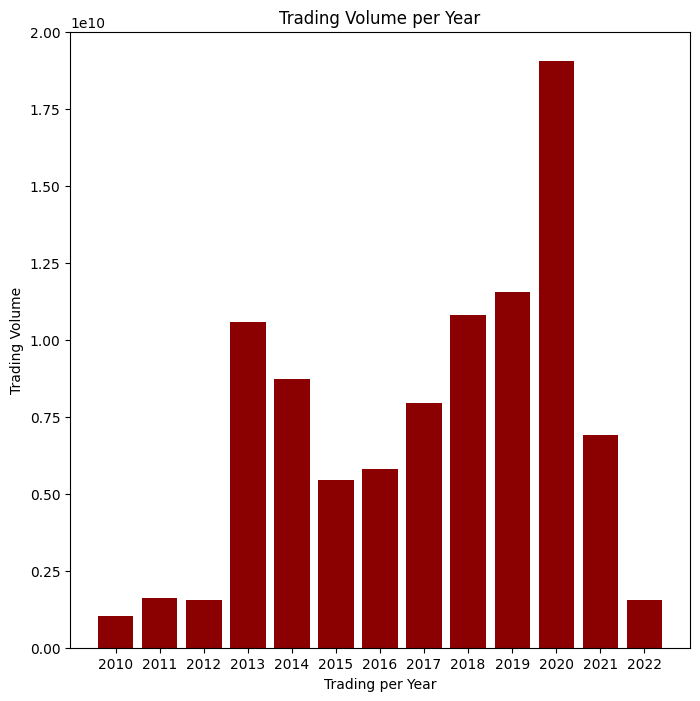

In [20]:
xtick = Volume_per_year['Trading per Year']
plt.figure(figsize=(8,8))
plt.bar(Volume_per_year['Trading per Year'],Volume_per_year['The Trading Volume'],color='darkred')
plt.xticks(xtick)
plt.xlabel('Trading per Year')
plt.ylabel('Trading Volume')
plt.title('Trading Volume per Year')
plt.show()

**insights: after we make columns for years we used this columns to make filter with the volume of trading per the year and make thr graph to show the differnce between every year with the volume of trading**

<h2>Trading per Year with The Opening Price of the Stock<h2>

In [21]:
openprice_per_year = df.groupby('Trading per Year')['The Opening Price of the Stock'].sum().reset_index()
openprice_per_year

,Trading per Year,The Opening Price of the Stock
0,2010,608.608000
1,2011,1351.828000
2,2012,1560.156000
3,2013,5262.587992
4,2014,11260.135974
5,2015,11583.530034
6,2016,10586.945990
7,2017,15777.669988
8,2018,15922.610065
9,2019,13760.617976


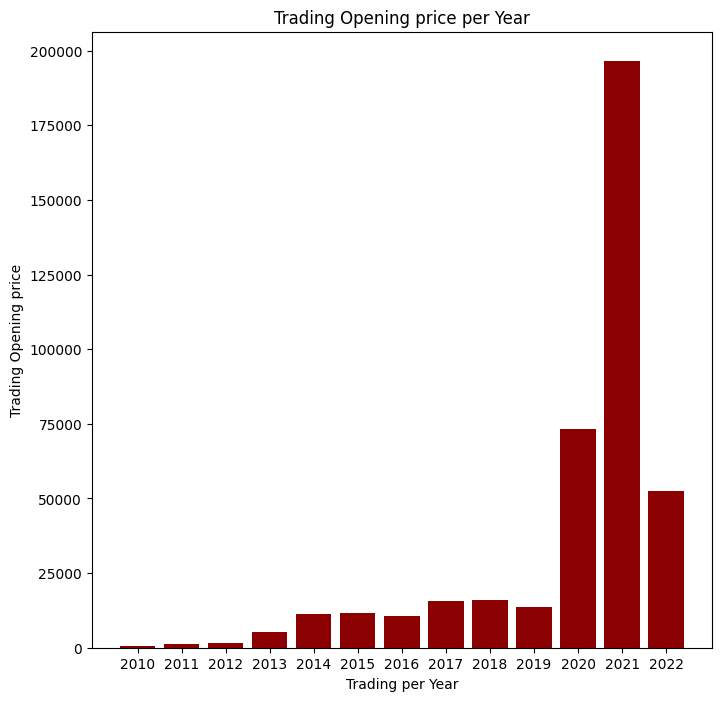

In [22]:
xtick = openprice_per_year['Trading per Year']
plt.figure(figsize=(8,8))
plt.bar(openprice_per_year['Trading per Year'],openprice_per_year['The Opening Price of the Stock'],color='darkred')
plt.xticks(xtick)
plt.xlabel('Trading per Year')
plt.ylabel('Trading Opening price')
plt.title('Trading Opening price per Year')
plt.show()

**insights: after we make columns for years we used this columns to make filter with the The Opening Price of the Stock of trading per the year and make thr graph to show the differnce between every year with the The Opening Price of the Stock of trading and we can see the highest Open in 2021**

<h2>Trading per Year with The Close Price of the Stock<h2>

In [23]:
close_price_per_year = df.groupby('Trading per Year')['The Closing Price of the Stock'].sum().reset_index()
close_price_per_year

,Trading per Year,The Closing Price of the Stock
0,2010,606.888000
1,2011,1350.960000
2,2012,1558.430000
3,2013,5261.822003
4,2014,11255.785988
5,2015,11594.162038
6,2016,10572.270021
7,2017,15778.678005
8,2018,15928.957984
9,2019,13785.922006


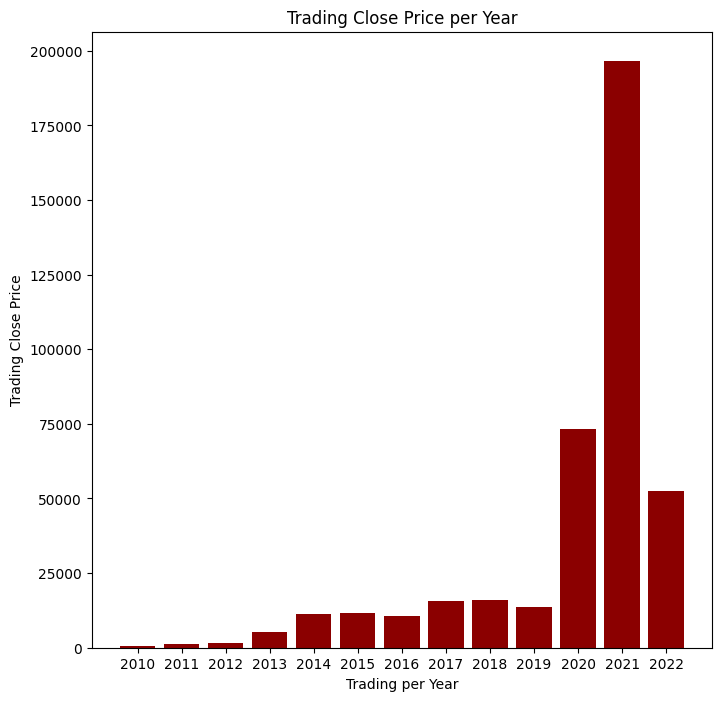

In [24]:
xtick = close_price_per_year['Trading per Year']
plt.figure(figsize=(8,8))
plt.bar(close_price_per_year['Trading per Year'],close_price_per_year['The Closing Price of the Stock'],color='darkred')
plt.xticks(xtick)
plt.xlabel('Trading per Year')
plt.ylabel('Trading Close Price')
plt.title('Trading Close Price per Year')
plt.show()

**insights: after we make columns for years we used this columns to make filter with the The Closing Price of the Stock of trading per the year and make thr graph to show the differnce between every year with the The Closing Price of the Stock of trading and we can see the highest close in 2021**

<h2>Trading per Year with The Highest Price the Stock<h2>

In [25]:
high_price_per_year = df.groupby('Trading per Year')['The Highest Price the Stock'].sum().reset_index()
high_price_per_year

,Trading per Year,The Highest Price the Stock
0,2010,626.008000
1,2011,1379.964000
2,2012,1590.458000
3,2013,5385.392005
4,2014,11463.474024
5,2015,11762.436003
6,2016,10757.048024
7,2017,15986.219974
8,2018,16249.419975
9,2019,13993.550017


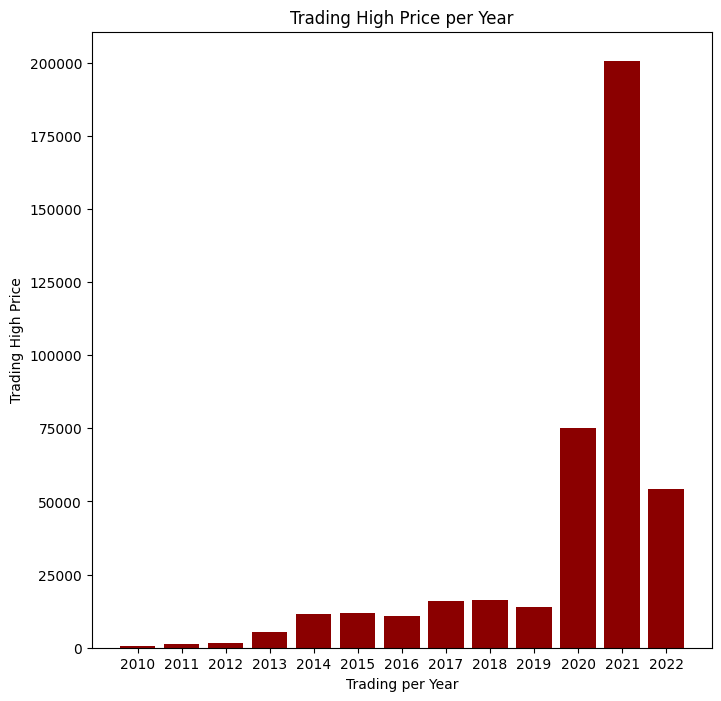

In [26]:
xtick = high_price_per_year['Trading per Year']
plt.figure(figsize=(8,8))
plt.bar(high_price_per_year['Trading per Year'],high_price_per_year['The Highest Price the Stock'],color='darkred')
plt.xticks(xtick)
plt.xlabel('Trading per Year')
plt.ylabel('Trading High Price')
plt.title('Trading High Price per Year')
plt.show()

**insights: after we make columns for years we used this columns to make filter with the The Highest Price of the Stock of trading per the year and make thr graph to show the differnce between every year with the The Highest Price of the Stock of trading and we can see the Highest close in 2021**

In [27]:
low_price_per_year = df.groupby('Trading per Year')['The Lowest Price the Stock'].sum().reset_index()
low_price_per_year

,Trading per Year,The Lowest Price the Stock
0,2010,588.798000
1,2011,1320.186000
2,2012,1527.294000
3,2013,5129.706001
4,2014,11047.988031
5,2015,11404.040014
6,2016,10396.821988
7,2017,15546.285994
8,2018,15589.725993
9,2019,13538.071990


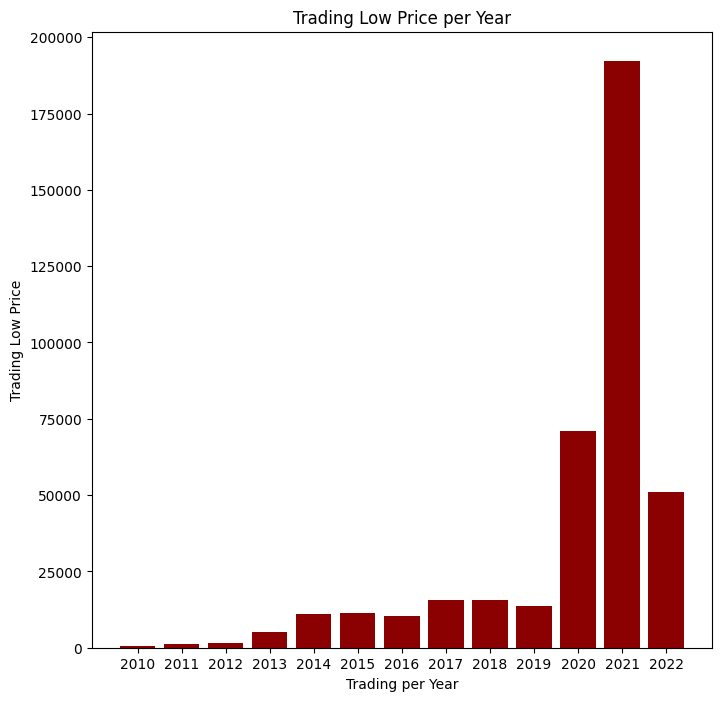

In [28]:
xtick = low_price_per_year['Trading per Year']
plt.figure(figsize=(8,8))
plt.bar(low_price_per_year['Trading per Year'],low_price_per_year['The Lowest Price the Stock'],color='darkred')
plt.xticks(xtick)
plt.xlabel('Trading per Year')
plt.ylabel('Trading Low Price')
plt.title('Trading Low Price per Year')
plt.show()

**insights: after we make columns for years we used this columns to make filter with the The Lowest Price of the Stock of trading per the year and make thr graph to show the differnce between every year with the The Lowest Price of the Stock of trading and we can see the Lowest in 2010**

****insgiths : from last graphs from closing and opening stock we can see the differdnce between to is very small and can say no difference****

In [29]:
df.head()

,Trading Day,The Opening Price of the Stock,The Highest Price the Stock,The Lowest Price the Stock,The Closing Price of the Stock,The Adjusted Closing Price,The Trading Volume,Trading per Year,Trading per Month
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,2010,6
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010,6
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010,7
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010,7
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010,7


<h2>The Opening Price of the Stock with The Closing Price of the Stock<h2>

In [30]:
open_close_year = df.groupby('Trading per Year')[['The Opening Price of the Stock','The Closing Price of the Stock']].sum().reset_index()
open_close_year

,Trading per Year,The Opening Price of the Stock,The Closing Price of the Stock
0,2010,608.608000,606.888000
1,2011,1351.828000,1350.960000
2,2012,1560.156000,1558.430000
3,2013,5262.587992,5261.822003
4,2014,11260.135974,11255.785988
5,2015,11583.530034,11594.162038
6,2016,10586.945990,10572.270021
7,2017,15777.669988,15778.678005
8,2018,15922.610065,15928.957984
9,2019,13760.617976,13785.922006


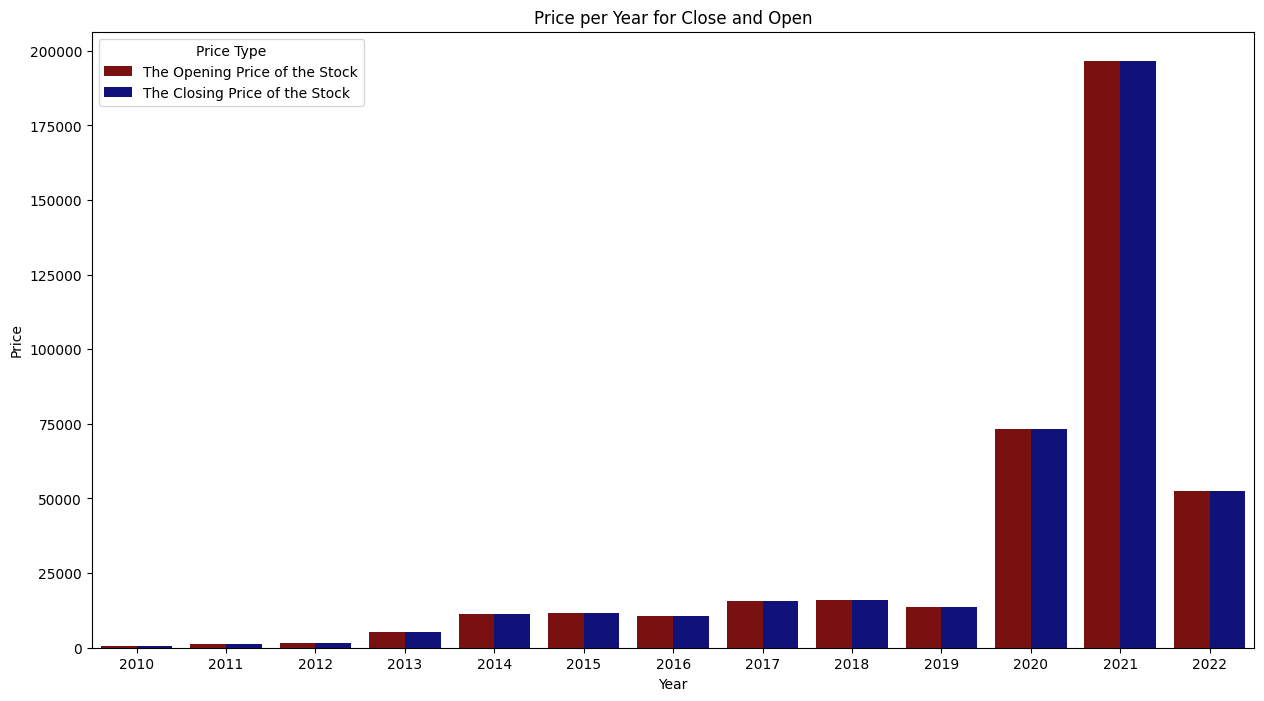

In [31]:
plt.figure(figsize=(15, 8))

melted_df = open_close_year.melt(id_vars='Trading per Year', var_name='Price Type', value_name='Price')

# Create the bar plot
sns.barplot(data=melted_df, x='Trading per Year', y='Price', hue='Price Type', palette=["darkred", "darkblue"])

plt.title('Price per Year for Close and Open')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

**insights: we can see from the graph the difference between stock open and close**

<h2>The Highest Price of the Stock with The Lowest Price of the Stock<h2>

In [32]:
high_low_year = df.groupby('Trading per Year')[['The Highest Price the Stock','The Lowest Price the Stock']].sum().reset_index()
high_low_year

,Trading per Year,The Highest Price the Stock,The Lowest Price the Stock
0,2010,626.008000,588.798000
1,2011,1379.964000,1320.186000
2,2012,1590.458000,1527.294000
3,2013,5385.392005,5129.706001
4,2014,11463.474024,11047.988031
5,2015,11762.436003,11404.040014
6,2016,10757.048024,10396.821988
7,2017,15986.219974,15546.285994
8,2018,16249.419975,15589.725993
9,2019,13993.550017,13538.071990


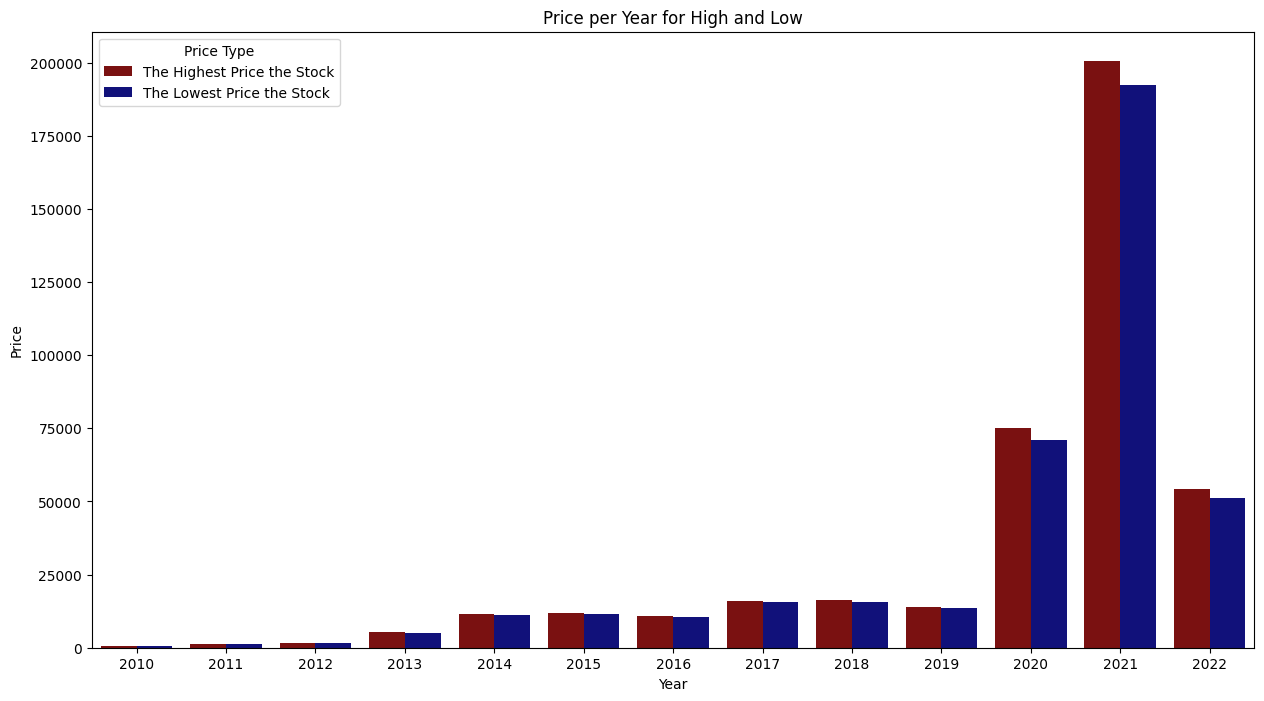

In [33]:
plt.figure(figsize=(15, 8))

melted_df = high_low_year.melt(id_vars='Trading per Year', var_name='Price Type', value_name='Price')

# Create the bar plot
sns.barplot(data=melted_df, x='Trading per Year', y='Price', hue='Price Type', palette=["darkred", "darkblue"])

plt.title('Price per Year for High and Low')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

**insights: we can see from the graph the difference between stock High and Low**

<h2> Distributions  <h2>

In [34]:
df.columns.to_list()

['Trading Day',
 'The Opening Price of the Stock',
 'The Highest Price the Stock',
 'The Lowest Price the Stock',
 'The Closing Price of the Stock',
 'The Adjusted Closing Price',
 'The Trading Volume',
 'Trading per Year',
 'Trading per Month']

In [35]:
histogram_labels = ['The Opening Price of the Stock',
                     'The Highest Price the Stock',
                     'The Lowest Price the Stock',
                     'The Closing Price of the Stock',
                     'The Adjusted Closing Price',
                     'The Trading Volume',
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

**insigths: In order to know where the data is concentrated on the graph for each column**

In [36]:
data_dir = '/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv'
df1 = pd.read_csv(data_dir, parse_dates=True, index_col='Date')

In [37]:
def line_plot(target_col):
    iplot(px.line(target_col,color_discrete_sequence=['darkred']))
    
cols = df1.columns.tolist()

for col in cols:
    line_plot(df1[col])

**To know each column that reached any price in each year The Opening Price of the Stock	The Highest Price the Stock	The Lowest Price the Stock	The Closing Price of the Stock	The Adjusted Closing Price	The Trading Volume**

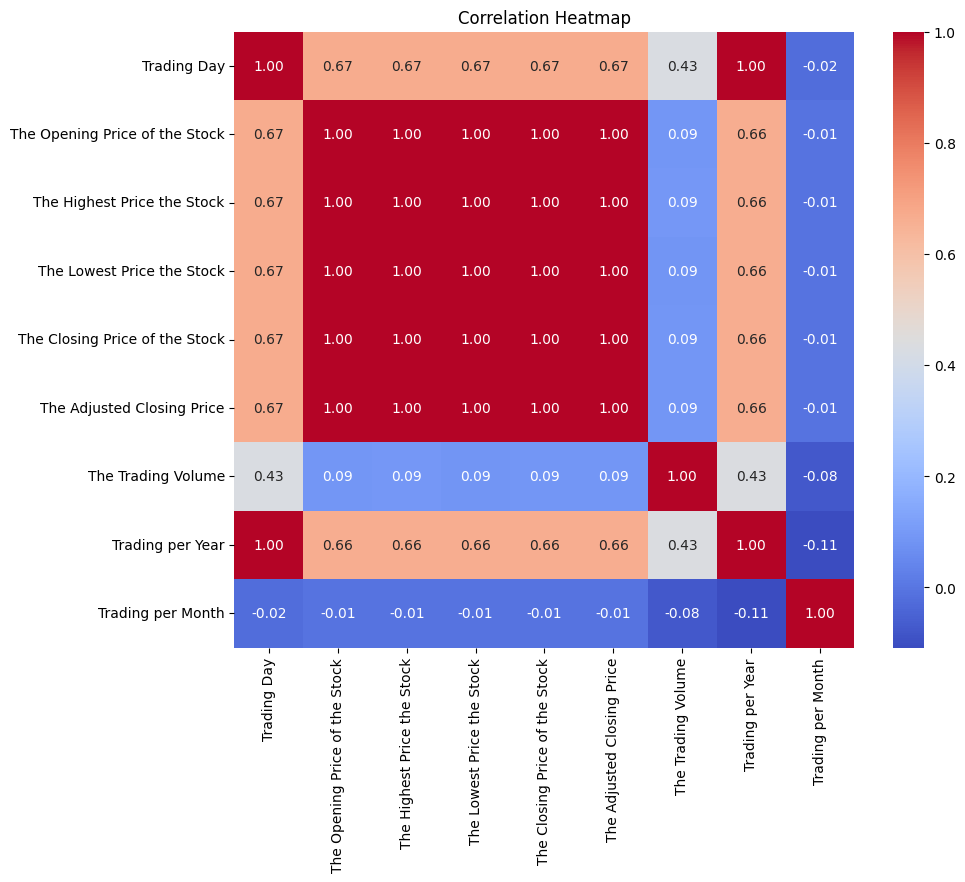

In [38]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()